**--Image processing--**
spatial domain process

import the packages

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Read one image from computer

In [3]:
cv2.cvtColor??

(256, 256, 3)


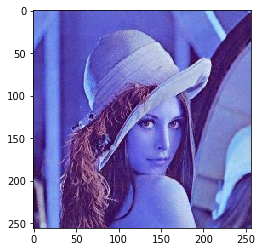

In [6]:
im = cv2.imread('lena.png')
# im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
print(im.shape)
plt.imshow(im,cmap="gray")

T(x)=0.5*x

In [24]:
im1 = im*0.01

# plt.subplot(1,2,1)
# plt.imshow(im, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(im1,cmap='gray')

roi1= im[0:10,0:10]
print('original {}'.format(roi1))

roi2= im1[0:10,0:10]
print('0.2* {}'.format(roi2))

cv2.imshow('original',im)

cv2.imshow('0.2',im1)
cv2.waitKey(0)
cv2.destroyAllWindows()

original [[[121 135 223]
  [123 137 225]
  [124 138 226]
  [126 140 228]
  [125 139 227]
  [124 138 226]
  [122 136 224]
  [120 134 222]
  [121 135 223]
  [119 133 221]]

 [[123 137 225]
  [122 139 226]
  [125 139 227]
  [123 140 227]
  [124 138 226]
  [120 137 224]
  [119 133 221]
  [116 133 220]
  [121 135 223]
  [117 134 221]]

 [[122 138 227]
  [120 138 227]
  [123 139 228]
  [120 138 227]
  [121 137 226]
  [116 134 223]
  [116 132 221]
  [112 130 219]
  [117 133 222]
  [113 131 220]]

 [[118 136 227]
  [117 137 225]
  [119 137 228]
  [117 137 225]
  [117 135 226]
  [115 135 223]
  [114 132 223]
  [112 132 220]
  [113 131 222]
  [112 132 220]]

 [[113 131 224]
  [112 133 224]
  [114 132 225]
  [113 134 225]
  [115 133 226]
  [113 134 225]
  [115 133 226]
  [112 133 224]
  [112 130 223]
  [111 132 223]]

 [[109 129 224]
  [108 131 223]
  [110 130 225]
  [109 132 224]
  [112 132 227]
  [110 133 225]
  [113 133 228]
  [111 134 226]
  [111 131 226]
  [110 133 225]]

 [[108 130 226]
  [

Calculate the mean of 3\times3 neighborhood for every pixel in one image

1. Read one image

In [13]:
im = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)
print(im.shape)
# plt.imshow(im)
cv2.imshow('gray',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

(256, 256)


2. compute the mean of 3*3 neighborhood using the for loop

In [15]:
import time

image fill size:2
[[159 159 159 ... 161 161 161]
 [159 159 159 ... 161 161 161]
 [159 159 159 ... 161 161 161]
 ...
 [ 44  44  44 ... 104 104 104]
 [ 44  44  44 ... 104 104 104]
 [ 44  44  44 ... 104 104 104]]
time is: 0.5


(-0.5, 255.5, 255.5, -0.5)

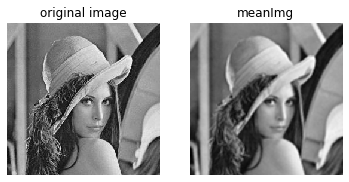

In [18]:
# compute the image fill size
pt_sz=5
fll_sz =np.int(pt_sz/2) 

print('image fill size:{}'.format(fll_sz))

# fill the image boundary
h,w = im.shape


# *********************************************************
# define image fill function byself
# def imgfill(im, fll_sz, val):
#     h, w = im.shape
#     outImg = np.zeros((h+2*fll_sz, w+2*fll_sz))
#     outImg[fll_sz:h+fll_sz, fll_sz:w+fll_sz]=im
#     outImg[0:fll_sz, 0:h+2*fll_sz]=val
#     outImg[0:h+2*fll_sz, 0:fll_sz]=val
#     outImg[0:h+2*fll_sz, w+fll_sz:w+2*fll_sz]=val
#     outImg[h+fll_sz:h+2*fll_sz, 0:w+2*fll_sz]=val
#     return outImg
# img = imgfill(im, fll_sz, 100)
# *********************************************************

# *****************************************************
# fill the image boundary with opencv function
img = cv2.copyMakeBorder(im,fll_sz,fll_sz,fll_sz,fll_sz,cv2.BORDER_REPLICATE)
print(img)

stp=1
outImg = np.zeros(im.shape)
start = time.process_time ()
for i in range(fll_sz,h+fll_sz,stp):
    for j in range(fll_sz, w+fll_sz, stp):
        ptRg = img[i-fll_sz:i+fll_sz,j-fll_sz:j+fll_sz]
        outImg[i-fll_sz,j-fll_sz]=np.mean(ptRg)

end = time.process_time ()

print('time is: {}'.format(end-start))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(outImg,cmap='gray')
plt.title('meanImg')
plt.axis('off')

using the funtion filter2D of opencv

In [65]:
cv2.filter2D??

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
origin img size:(256, 256), new image size:(256, 256)
[[159 161 162 164 163 162 160 158 159 157]
 [161 163 163 164 162 161 157 157 159 158]
 [162 162 163 162 161 158 156 154 157 155]
 [161 161 162 161 160 159 157 156 156 156]
 [156 157 157 158 158 158 158 157 155 156]
 [155 155 156 156 158 157 159 158 157 157]
 [156 156 156 156 156 156 157 157 155 157]
 [157 156 155 154 154 154 154 154 151 154]
 [160 162 162 156 151 151 153 154 153 149]
 [156 157 156 154 153 154 156 158 159 155]]
[[162 162 162 162 161 160 159 158 156 156]
 [162 162 162 162 161 160 159 158 157 156]
 [161 161 161 161 160 159 158 157 156 156]
 [160 160 160 160 159 158 158 157 156 156]
 [158 158 158 158 158 158 157 157 156 156]
 [157 157 157 157 157 157 156 156 156 156]
 [157 157 157 156 156 156 155 155 155 155]
 [157 157 156 156 155 155 155 155 155 155]
 [157 156 156 155 155 155 155 

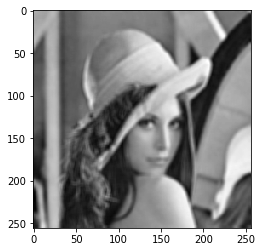

In [72]:
# create the kernel
pt_sz=5
fll_sz =np.int(pt_sz/2) 
ker = np.ones((pt_sz,pt_sz),dtype=np.float32)/(pt_sz*pt_sz)
print(ker)

# using the filter2D funciton
outImg = cv2.filter2D(im,-1,ker)
plt.imshow(outImg,cmap='gray')

print('origin img size:{}, new image size:{}'.format(im.shape, outImg.shape))
print(im[:10,:10])
print(outImg[:10,:10])

In [40]:
cv2.copyMakeBorder??

kernel operations 
blur kernel

In [17]:
kernel = np.array((
        [0.0625, 0.125, 0.0625],
        [0.125, 0.25, 0.125],
        [0.0625, 0.125, 0.0625]), dtype="float32")
im = cv2.imread('car.png')
dst = cv2.filter2D(im, -1, kernel)

himg = np.hstack((im, dst))
print(im.shape, dst.shape, himg.shape)
# plt.imshow(himg)
cv2.imshow('merged_img', (himg))
cv2.waitKey(0)
cv2.destroyAllWindows()

(337, 464, 3) (337, 464, 3) (337, 928, 3)


sobel kernel

In [19]:
kernel = np.array((
        [-1, -2, -1],
        [0,0,0],
        [1,2,1]), dtype="float32")
im = cv2.imread('car.png')
dst = cv2.filter2D(im, -1, kernel)

himg = np.hstack((im, dst))
print(im.shape, dst.shape, himg.shape)
# plt.imshow(himg)
cv2.imshow('merged_img', (himg))
cv2.waitKey(0)
cv2.destroyAllWindows()

(337, 464, 3) (337, 464, 3) (337, 928, 3)


In [20]:
def spFilter(kernel, im ):
    dst = cv2.filter2D(im, -1, kernel)
    himg = np.hstack((im, dst))
    cv2.imshow('merged_img', (himg))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return himg

kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]])
spFilter(kernel, im)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[128, 128, 128],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [  1,   3,   4],
        [  3,   5,   6],
        [  5,   7,   8]],

       [[128, 128, 128],
        [ 15,  14,  16],
        [ 16,  15,  17],
        ...,
        [ 16,  14,  13],
        [ 11,   9,   8],
        [  5,   3,   2]],

       [[128, 128, 128],
        [ 15,  14,  16],
        [ 16,  15,  17],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [3]:
cv2.copyMakeBorder??

In [7]:
im.shape

(256, 256, 3)

In [9]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [10]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])